## Question 1: Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img style="width:50%" src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

## 1. Import Data

In [1]:
# Read in dataset
import pandas as pd

df = pd.read_csv('apps.csv')

# Drop duplicates
apps = df.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape[0])

# Print random sample of 5 entries
apps.sample(n = 5)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
705,869,Spectrum TV,ENTERTAINMENT,3.4,46618,NaN,"5,000,000+",Free,0,Teen,Entertainment,"July 19, 2018",Varies with device,Varies with device
879,1090,"Robinhood - Investing, No Fees",FINANCE,4.6,57493,NaN,"1,000,000+",Free,0,Everyone,Finance,"July 31, 2018",Varies with device,Varies with device
2152,2730,"Ebates: Cash Back, Coupons, Rewards & Savings",SHOPPING,4.5,37253,31M,"1,000,000+",Free,0,Everyone,Shopping,"August 3, 2018",4.31.2,4.4 and up
4994,5986,BC Hockey,SPORTS,3.7,20,8.9M,"1,000+",Free,0,Everyone,Sports,"December 8, 2017",3.1,4.4 and up
3590,4494,Q,FAMILY,4.2,69126,60M,"1,000,000+",Free,0,Everyone,Puzzle,"April 19, 2018",2.9.4,4.0 and up


The total number of apps in the dataset are 9659 apps. 

## 2. Data cleaning
<p>The three features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, and <code>Price</code>. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (<code>, $ +</code>) and letters (<code>M k</code>) in the <code>Installs</code>, <code>Size</code>, and <code>Price</code> columns. Also it make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.</p>

In [2]:
# List of characters to remove
chars_to_remove = ['+', ',', '$', 'M', 'k']
# List of column names to clean
cols_to_clean = ['Installs','Size', 'Price']

# Loop for each column
for i in cols_to_clean:
    for char in chars_to_remove:
        apps[i] = apps[i].str.replace(char, '')

# Convert col to numeric
apps[['Installs','Size', 'Price']] = apps[['Installs','Size', 'Price']].apply(pd.to_numeric) 
apps.head(10)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
apps.dtypes
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Through app.dtypes we see that our columns: Size, Installs and Price have been converted into numeric data type. 

## 3. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>

Number of categories =  33


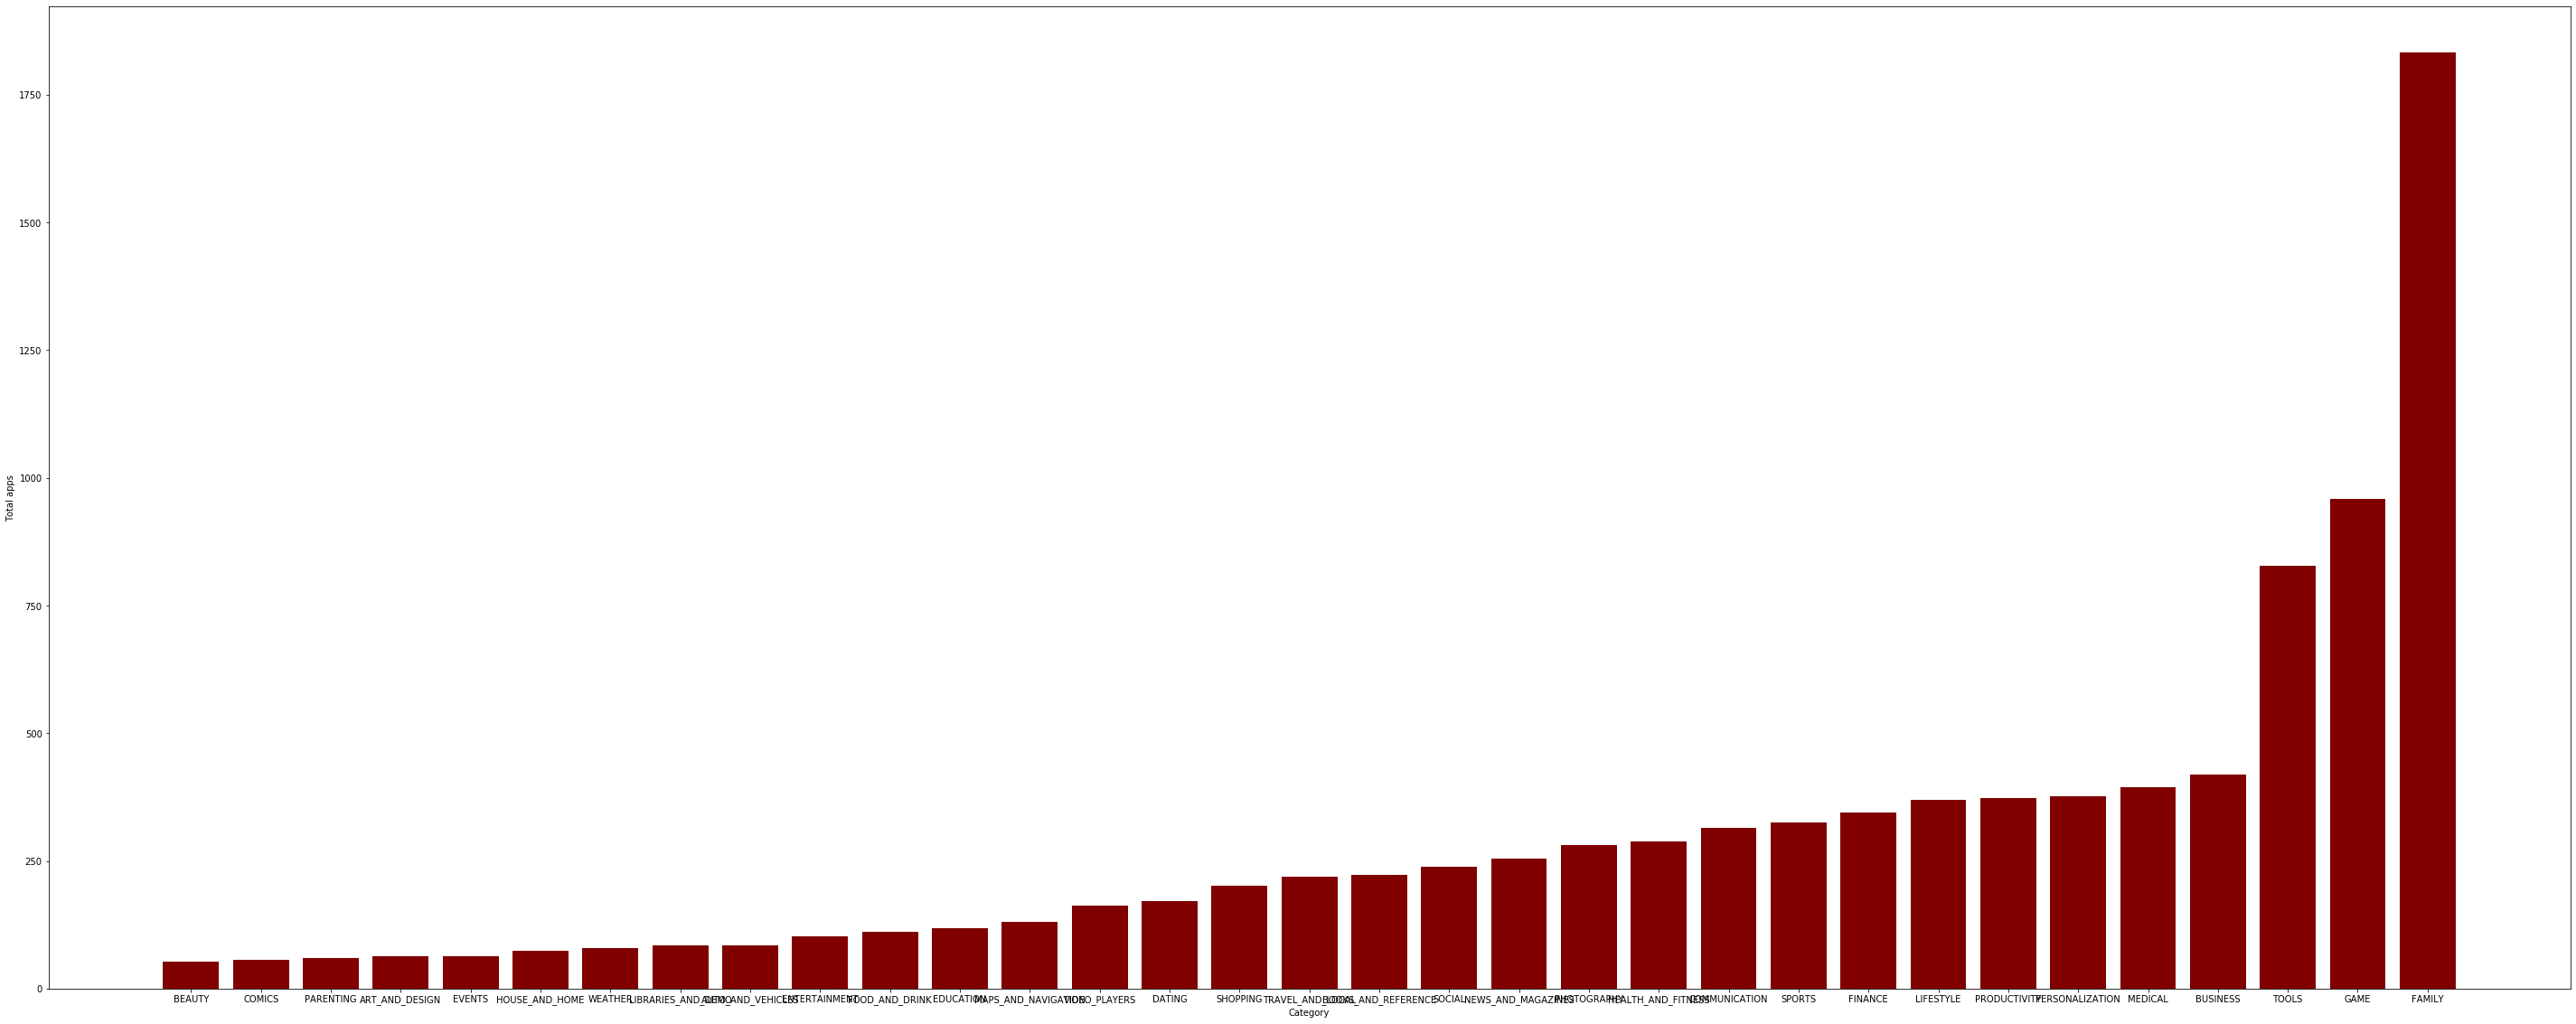

In [4]:
#import your favourite library for visualization
import matplotlib.pyplot as plt

# Print the total number of unique categories
num_categories = apps['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category' and sort them for easier plotting
appData = apps.groupby('Category')['App'].agg('count').reset_index()
appData = appData.sort_values(by=['App'])
appData.head(40)

# Plot any graph (bar,chart,line etc.) to show each category and its count for visualization
fig2 = plt.figure(figsize = (50,20)) 
plt.bar(appData.Category, appData.App, color ='maroon', width = 0.8)
plt.xlabel("Category") 
plt.ylabel("Total apps")  
# show plot 
plt.show() 

There are a total of 33 different categories. If we zoom in the graph, we can see that the category with the highest share of active apps is FAMILY with GAME on second place and TOOLS on third. Hence these are dominating the market. 
The category with the least number of apps is BEAUTY. 

## 4. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>Add Histogram plot to visualize the distribution of app ratings</p>

Average app rating =  4.173243045387998


C:\Users\Shiza\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Shiza\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 16.,   0.,   1.,   0.,   3.,   3.,   4.,   8.,   0.,   8.,  11.,
         12.,   8.,  14.,  20.,  19.,  20.,   0.,  24.,  23.,  40.,  45.,
         81.,  69.,  63., 100.,   0., 126., 156., 167., 224., 286., 359.,
        513., 621.,   0., 810., 897., 895., 848., 683., 442., 221.,  85.,
        271.]),
 array([1.        , 1.08888889, 1.17777778, 1.26666667, 1.35555556,
        1.44444444, 1.53333333, 1.62222222, 1.71111111, 1.8       ,
        1.88888889, 1.97777778, 2.06666667, 2.15555556, 2.24444444,
        2.33333333, 2.42222222, 2.51111111, 2.6       , 2.68888889,
        2.77777778, 2.86666667, 2.95555556, 3.04444444, 3.13333333,
        3.22222222, 3.31111111, 3.4       , 3.48888889, 3.57777778,
        3.66666667, 3.75555556, 3.84444444, 3.93333333, 4.02222222,
        4.11111111, 4.2       , 4.28888889, 4.37777778, 4.46666667,
        4.55555556, 4.64444444, 4.73333333, 4.82222222, 4.91111111,
        5.        ]),
 <a list of 45 Patch objects>)

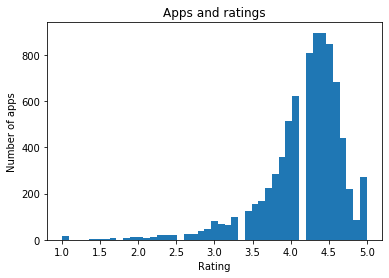

In [5]:
# Overall Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings using histogram. Write proper x axis and y axis labels.
plt.title('Apps and ratings')
plt.xlabel('Rating')
plt.ylabel('Number of apps')
plt.hist(apps.Rating, bins=45)

The average of the app ratings is 4.17 and hence as can be seen, the histogram is skewed to the right which means that most of the apps have high rating and very few apps have ratings below 3

## 5. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free/cheaper apps over paid apps? What price range do majoriy of apps fall into?</li>
</ul>

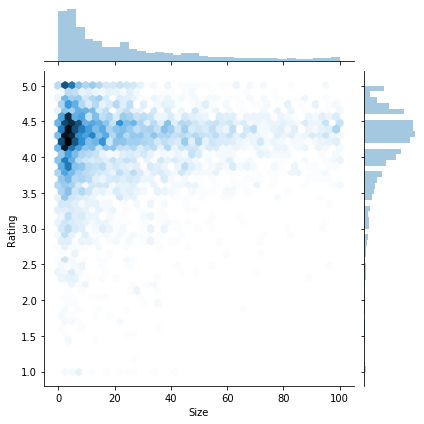

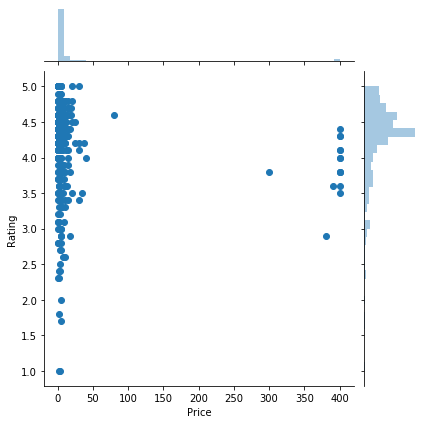

In [6]:
import seaborn as sns
# Get the subset for categories with at least 250 apps
categoriesWithMoreApps = apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

# Plot size vs. rating
sns.jointplot(data=categoriesWithMoreApps, x="Size", y="Rating", kind='hex')
#sns.pairplot(categoriesWithMoreApps, x_vars="Size", y_vars="Rating", size=7, aspect=0.7)

# Subset for paid apps only
paid_apps =  apps[apps.Type == 'Paid']


# Plot price vs. rating
sns.jointplot(data=paid_apps, x="Price", y="Rating")
#sns.pairplot(paid_apps, x_vars="Price", y_vars="Rating", size=7, aspect=0.7)



As can be observed from the jointplots, light-weighted apps have a better rating and have more user ratings which means that more people are using them. Apps with hghest rating are less than 25 MB.
The second plot shows that users prefer free apps to paid apps. Apps with the highest rating fall into Price range of free to $10. 

## 6. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients.
<ul>
<li>What is the maximum price for GAME category. What is the average price of paid GAME category? </li>
<ul>

Max Price of Game apps is $ 17.99
Mean Price of Game apps is $ 3.467195121951223


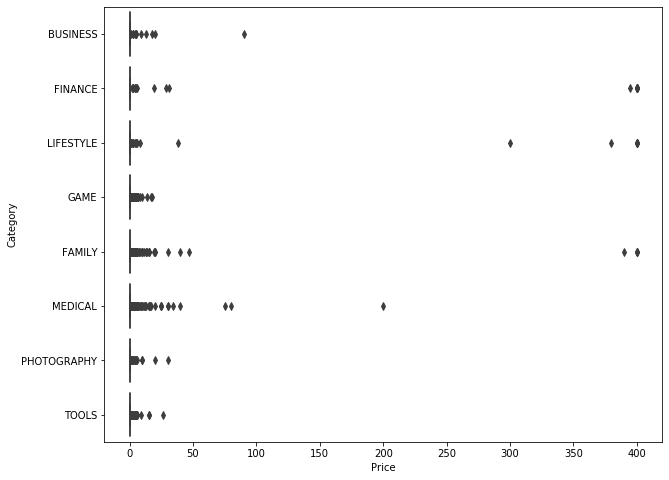

In [7]:
# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine and plot the price trend for the above categories
plt.figure(figsize=(10,8))
sns.boxplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'])

# Examine GAME Category. What is the maximum price for GAME category. What is the average price of paid GAME category?
paid_game_apps = popular_app_cats.loc[(popular_app_cats['Category'] == 'GAME') & (popular_app_cats['Type'] != 'Free')]

max_price = paid_game_apps['Price'].max()
print("Max Price of Game apps is $", max_price)

mean_price = paid_game_apps['Price'].mean()
print("Mean Price of Game apps is $", mean_price)


<p>The app category with the highest prices is MEDICAL category followed by FAMILY. 
Game category are cheaper with average Price of \$3.467 and the maximum price of an app in the Game category is $17.99.</p>


## 7. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.

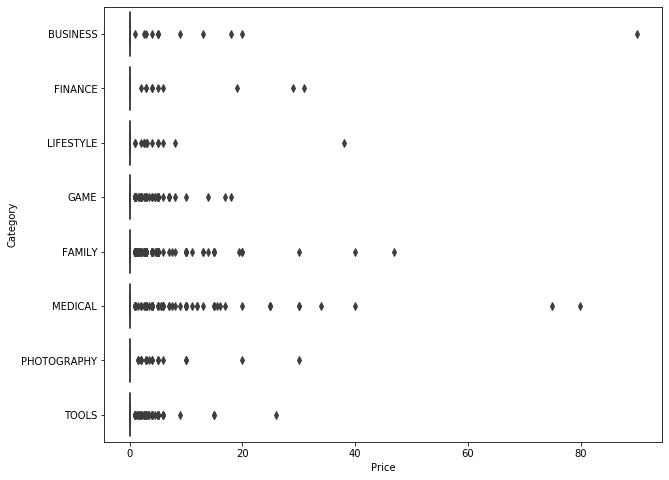

In [8]:
# Select a few popular app categories
import seaborn as sns
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Category, Name and Price of apps priced above $100 which will be considered as Junk apps.
junk_apps = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 100]

# Select apps priced below $100 which will be considered as authentic apps.
authentic_apps = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] < 100]

# Examine and visualize price vs category with the authentic apps. You can use box plot
plt.figure(figsize=(10,8))
sns.boxplot(x=authentic_apps['Price'] , y=authentic_apps['Category'])


Now we are better able to see the distribution of reasonably priced apps. Even in this range, most apps with price more than $20 are from MEDICAL and FAMILY categories. 

## 8. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps are installed as much as free apps?

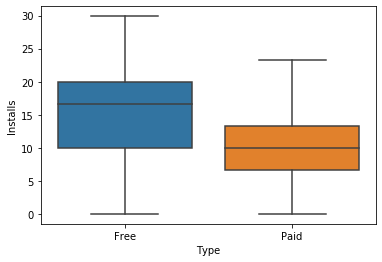

In [9]:
import numpy as np
np.seterr(divide = 'ignore') 
# Visualize Number of downloads of paid apps vs. free apps. Hint (convert number of downloads to log in order to scale down actual value)
types_of_apps = ['Free', 'Paid']
app_types = apps.loc[apps['Type'].isin(types_of_apps)]

# Box plot is preferred.
sns.boxplot(x= app_types['Type'], y=np.log2(app_types.Installs))

As can be observed from the boxplots, the number of installs of free apps are more than the installs of paid apps, however the difference is not too stark.

## 9. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>Sentiment polarity defines sentiment with a range from +1 to -1 (+1 being positive, -1 being negative and 0 being neutral)</p>
<p>What is the sentiment trend of user reviews for paid and free apps?</p>


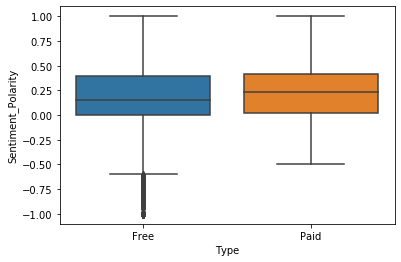

In [10]:
# Load user_reviews.csv
reviews_data = pd.read_csv('user_reviews.csv')

# Join and merge the two dataframe apps and user_reviews. Drop NA values from Sentiment and Translated_Review columns
full_data = pd.merge(apps, reviews_data, on = 'App', how = "inner")
full_data = full_data.dropna(subset=['Sentiment', 'Translated_Review'])

# Visualize user review sentiment polarity for paid vs. free apps. Hint (use Box plot for better visualization and analysis)
types_of_app = ['Free', 'Paid']
full_data_with_types = full_data.loc[full_data['Type'].isin(types_of_apps)]
full_data_with_types.head(50)
sns.boxplot(x= full_data_with_types['Type'], y=full_data_with_types['Sentiment_Polarity'])

The neutral and postive comments of both free and paid apps is quite similar. The median sentiment polarity score of paid apps is a little higher than free apps. An interesting observation here is that free apps' negative sentiment polarity is much more than paid apps', which means that free apps tend to get more negative comments or 'mean' comments than paid apps which get more neutral negative comments with an extreme of -0.5.